#### Regularization
Regularziation is process of Reduseing the Error in the data 
Coeff == weight
inter 


1. To avoid overfitting by not generating high coefficients for predictors that are sparse.   
2. To stabilize the estimates especially when there's collinearity in the data.

![](https://lh3.googleusercontent.com/-E3KQKy4Xr2k/XoCHxaqut8I/AAAAAAAAnkU/vxHlU11jYUcud__TvmCiD3BinZ6CBlT9QCK8BGAsYHg/s0/2020-03-29.png)

### Regularization Importence:

* Regularization favors simpler models to more complex models to prevent your model from overfitting to the data. 
* How so? They address the following concerns within a model: 
    * variance-bias 
    * tradeoff, 
    * multicollinearity, 
    * sparse data handling(i.e. the situation where there are more observations than features), 
    * feature selection, and an easier interpretation of the output.

![](https://lh3.googleusercontent.com/-JVNPgzVancE/XXo83tMt6MI/AAAAAAAAhnc/C9hR-ITjlsASddesW26WzGaFTMDwya20gCK8BGAsYHg/s0/2019-09-12.png)

If an intercept is included in the model, it is usually left unchanged.

![](https://lh3.googleusercontent.com/-TTrK9yLwMPw/XXo81jXY65I/AAAAAAAAhnY/MK_rHcfXsHEYwjvyr8z0C0dsaPhJYOfAACK8BGAsYHg/s0/2019-09-12.png)

#### Difference between L1 and L2 regularization¶
|L1(LASSO)|L2(Ridge)|
|---|---|
|L1 Regularization|L2 Regularization|
|L1 penalizes sum of absolute value of weights.|L2 regularization penalizes sum of square weights.|
|L1 has a sparse solution|L2 has a non sparse solution|
|L1 has multiple solutions|L2 has one solution|
|L1 has built in feature selection|L2 has no feature selection|
|L1 is robust to outliers|L2 is not robust to outliers|
||L2 gives better prediction when output variable is a function of all input features|
|L1 generates model that are simple and interpretable but cannot learn complex patterns|L2 regularization is able to learn complex data patterns|
|$L = ∑( Ŷi- Yi)2 + λ∑ |β|  Lasso = Sum of Error + Sum of the absolute value of coefficients$ |$L = ∑( Ŷi– Yi)² + λ∑ β² Ridge Formula:Sum of Error + Sum of the squares of coefficients$|


In [17]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import matplotlib
#matplotlib.rcParams.update({'font.size': 12})
from sklearn.datasets import load_boston   # Default data set
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso


In [18]:
boston=load_boston()
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [19]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [20]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [21]:
boston.filename

'c:\\users\\reddy\\appdata\\local\\programs\\python\\python36\\lib\\site-packages\\sklearn\\datasets\\data\\boston_house_prices.csv'

In [22]:
boston.target  

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [23]:
boston_df=pd.DataFrame(boston.data,columns=boston.feature_names)
boston_df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [24]:
boston_df.tail()

CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
501  0.06263  0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527  0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076  0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959  0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741  0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
501     21.0  391.99   9.67  
502     21.0  396.90   9.08  
503     21.0  396.90   5.64  
504     21.0  393.45   6.48  
505     21.0  396.90   7.88

In [25]:
boston_df.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT  
count  506.000000  
mean    12.653063  
std      7.141062  
min      1.730000  
25%      6.950000  
50%     11.360000  
75%     16.955000  
max     37.970000

In [26]:
import pandas_profiling

c:\users\reddy\appdata\local\programs\python\python36\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
c:\users\reddy\appdata\local\programs\python\python36\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
c:\users\reddy\appdata\local\programs\python\python36\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [27]:
pandas_profiling.ProfileReport(boston_df)

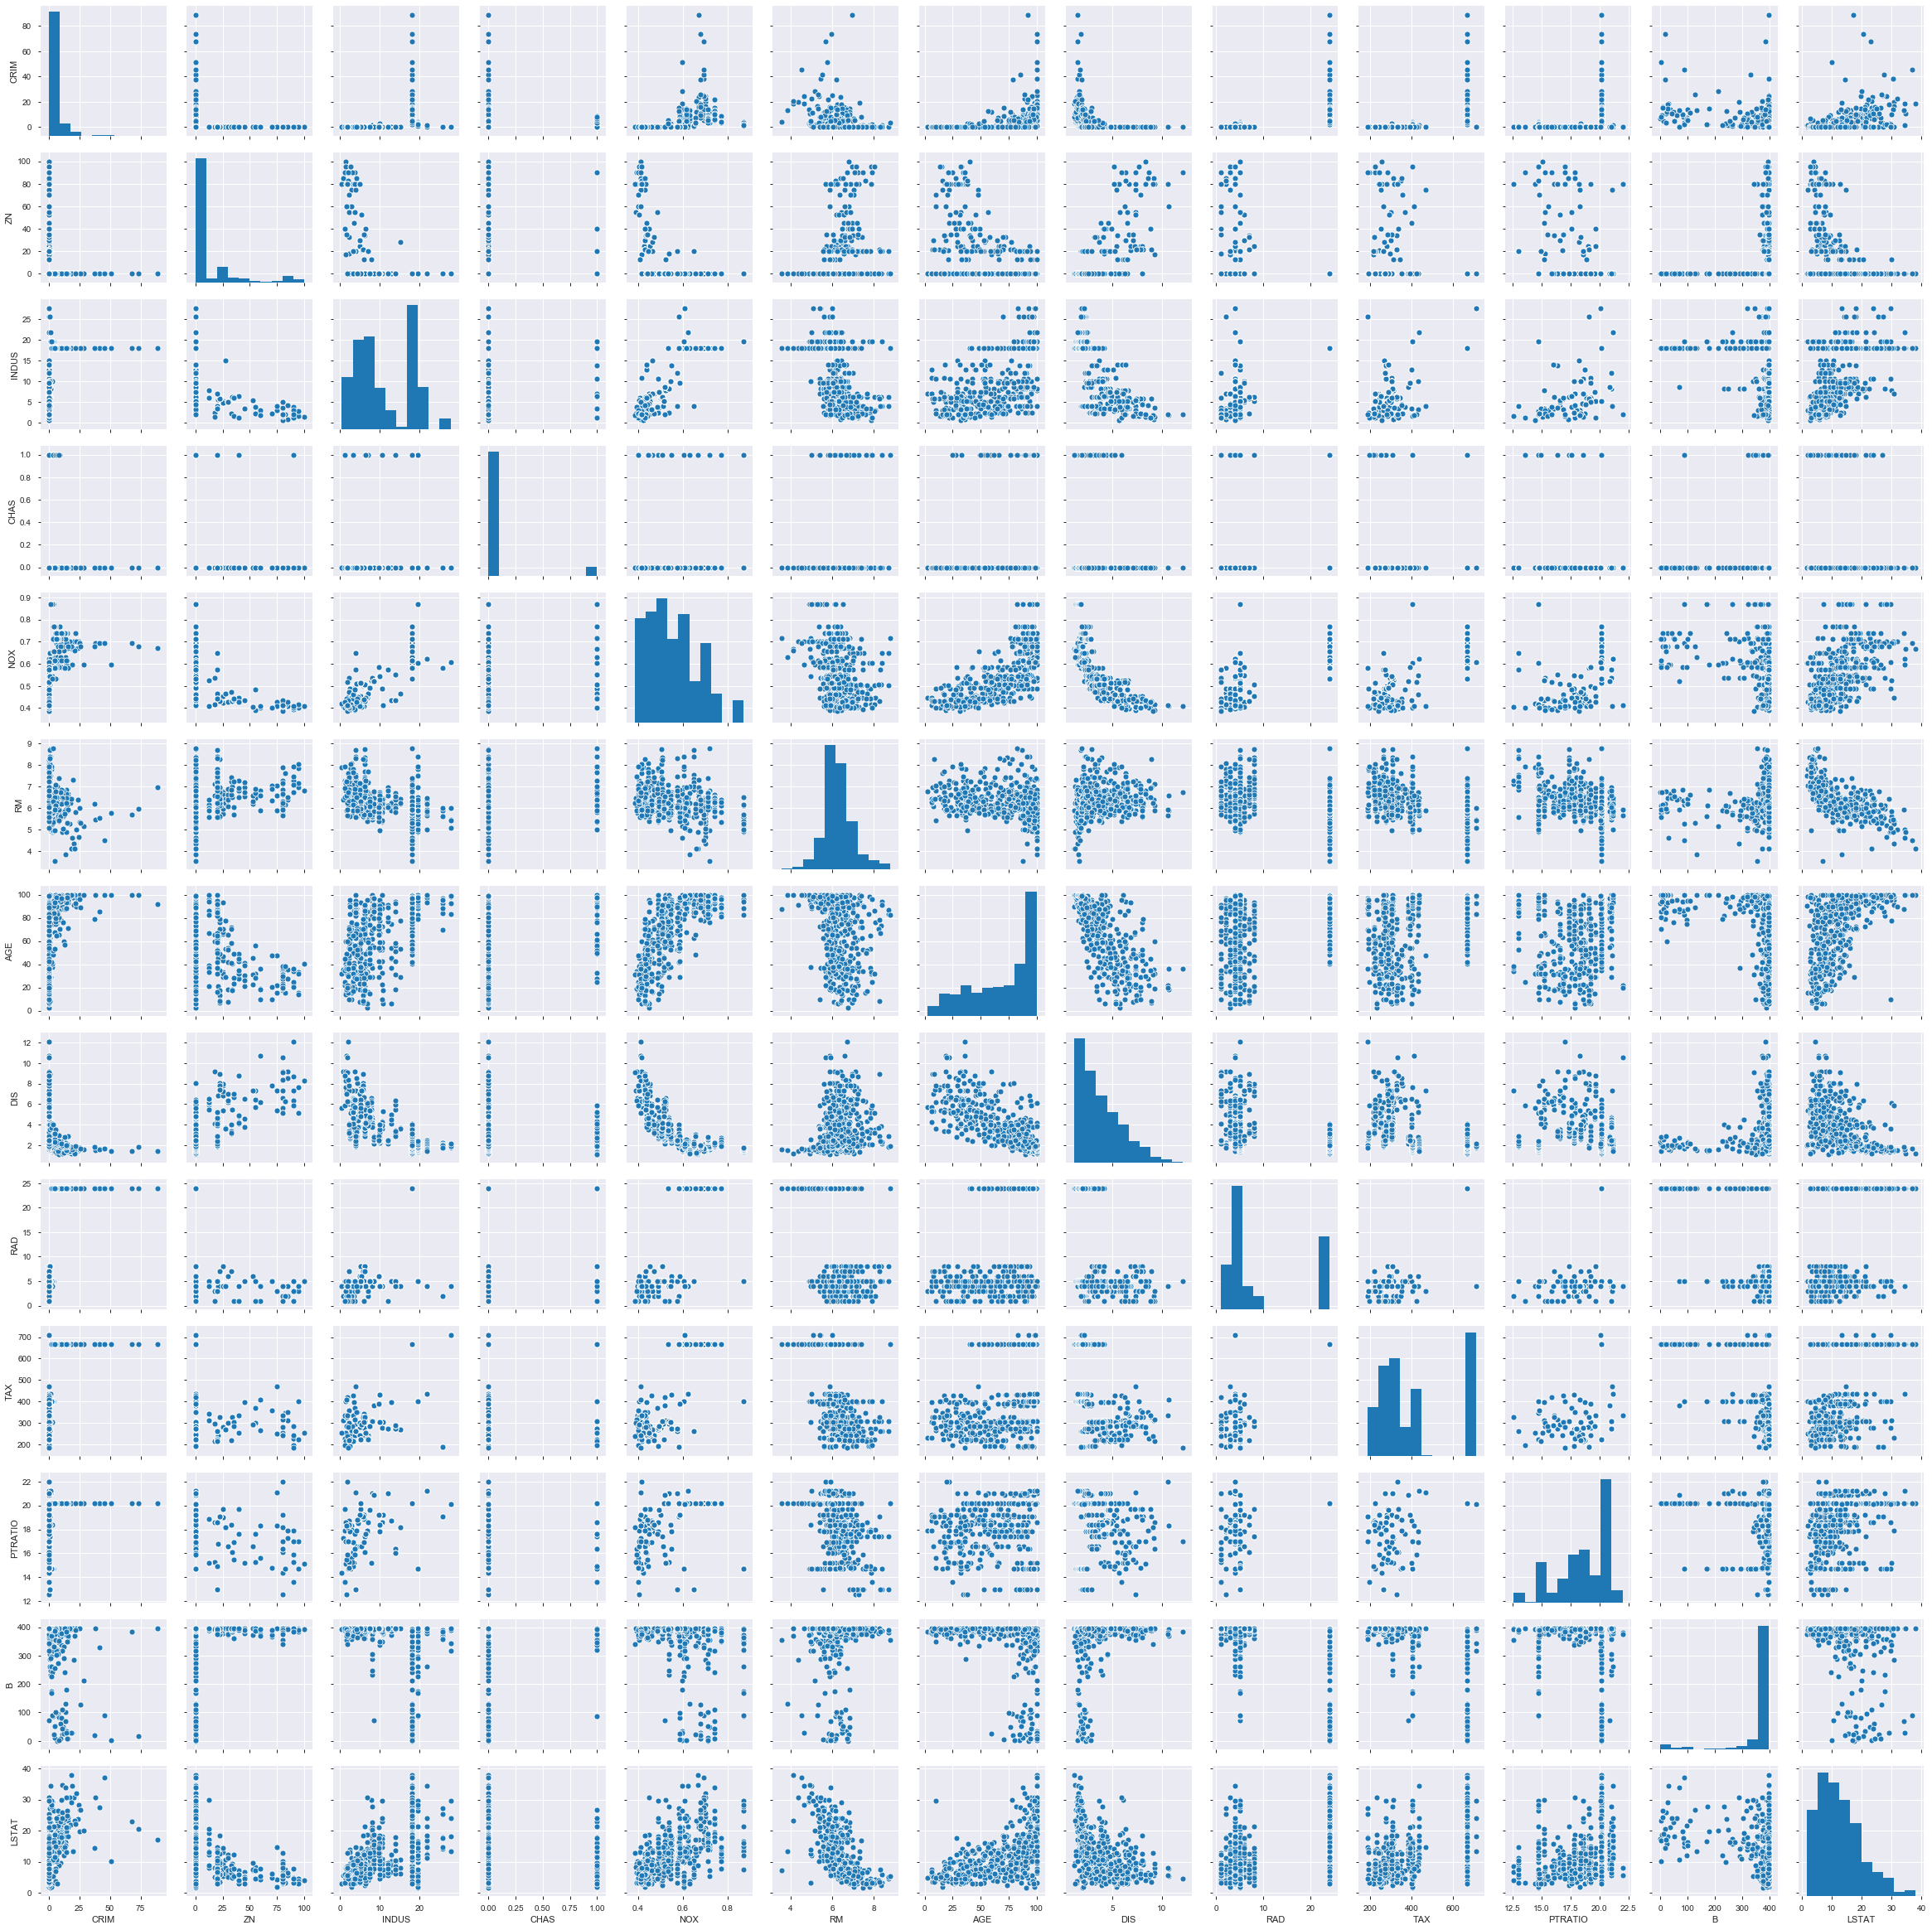

In [28]:
import seaborn as sns
sns.pairplot(boston_df)

##### add another column that contains the house prices which in scikit learn datasets are considered as target

In [29]:
boston_df['Price']=boston.target
print(boston_df.head(3))

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   

   PTRATIO       B  LSTAT  Price  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  


In [30]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [31]:
boston_df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  Price  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2

In [32]:
Features = boston_df.drop('Price',axis=1)
Features.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [33]:
Target = boston_df['Price']
Target

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: Price, Length: 506, dtype: float64

In [105]:
X_train,X_test,y_train,y_test=train_test_split(Features,Target,test_size=0.2)
print(len(X_test), len(y_test))

102 102


#### LinearRegression

* $Y = {\beta_0+\beta_1*X}$
* Where 
    * $Y$ is New Predication
    * $X$ is Data or how far along
    * ${\beta_1}$ Slope or Gradient or weight
    * ${\beta_0}$ value of y when x=0 or Bias Y Intercept or how far up

In [35]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
lr.coef_

array([-1.05597367e-01,  4.91939819e-02,  5.88236308e-02,  3.40624468e+00,
       -1.90681002e+01,  3.89936997e+00, -8.04171274e-03, -1.56498485e+00,
        3.23194358e-01, -1.35985010e-02, -1.02827018e+00,  1.04347252e-02,
       -4.61488862e-01])

In [37]:
lr.intercept_

37.487018733733876

In [38]:
Train_score = lr.score(X_train,y_train)
Train_score

0.7381142871919382

In [39]:
Test_Score = lr.score(X_test,y_test)
Test_Score

0.7388388681330857

### Ridge Regression

* Higher the alpha value, more restriction on the coefficients; 
* low alpha > more generalization, 
* coefficients are barely
* Restricted and in this case linear and ridge regression resembles
* $L = ∑( Ŷi– Yi)² + λ∑ β²$



* Ridge assigns a penalty that is the squared magnitude of the coefficients to the loss function multiplied by lambda. 
* As Lasso does, ridge also adds a penalty to coefficients the model overemphasizes. 
* The value of lambda also plays a key role in how much weight you assign to the penalty for the coefficients. 
* The larger your value of lambda, the more likely your coefficients get closer and closer to zero. 
* Unlike lasso, the ridge model will not shrink these coefficients to zero.

**Ridge Formula:** Sum of Error + Sum of the squares of coefficients

$L = ∑( Ŷi– Yi)² + λ∑ β²$

#####  What are some limitations of Ridge?
* Ridge does not eliminate coefficients in your model even if the variables are irrelevant. 
* This can be negative if you have more features than observations.

In [40]:
rr = Ridge(alpha=0.01)   # Lambda
rr.fit(X_train, y_train)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [49]:
rr.coef_

array([-1.05518752e-01,  4.92257357e-02,  5.81792112e-02,  3.40460072e+00,
       -1.89126121e+01,  3.90025004e+00, -8.19021699e-03, -1.56272760e+00,
        3.22842583e-01, -1.36109356e-02, -1.02651485e+00,  1.04426547e-02,
       -4.61658612e-01])

In [51]:
# get importance
importance = rr.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: -0.10552
Feature: 1, Score: 0.04923
Feature: 2, Score: 0.05818
Feature: 3, Score: 3.40460
Feature: 4, Score: -18.91261
Feature: 5, Score: 3.90025
Feature: 6, Score: -0.00819
Feature: 7, Score: -1.56273
Feature: 8, Score: 0.32284
Feature: 9, Score: -0.01361
Feature: 10, Score: -1.02651
Feature: 11, Score: 0.01044
Feature: 12, Score: -0.46166


In [42]:
rr.intercept_

37.37890722509979

In [43]:
rr.score(X_train,y_train)

0.7381134201034641

In [44]:
rr.score(X_test,y_test)

0.7389110550246148

In [45]:
rr100 = Ridge(alpha=100) #  comparison with alpha value
rr100.fit(X_train, y_train)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [46]:
rr100.coef_

array([-0.10171721,  0.05853511, -0.0165041 ,  0.69157444, -0.21695159,
        2.08412193, -0.00594719, -1.20367535,  0.34479202, -0.0179351 ,
       -0.90226827,  0.01043113, -0.62622683])

In [47]:
rr100.intercept_

39.13512254814582

In [80]:
Ridge_train_score100 = rr100.score(X_train,y_train)   # Alpha = 100
Ridge_train_score100

0.7081544164640563

In [ ]:
Ridge_test_score100 = rr100.score(X_test, y_test)
Ridge_test_score

In [ ]:
print("linear regression train score:", Train_score)
print("linear regression test score:", Test_Score)
print ("ridge regression train score low alpha:", Ridge_train_score)
print ("ridge regression test score low alpha:", Ridge_test_score)
print ("ridge regression train score high alpha:", Ridge_train_score100)
print ("ridge regression test score high alpha:", Ridge_test_score100)

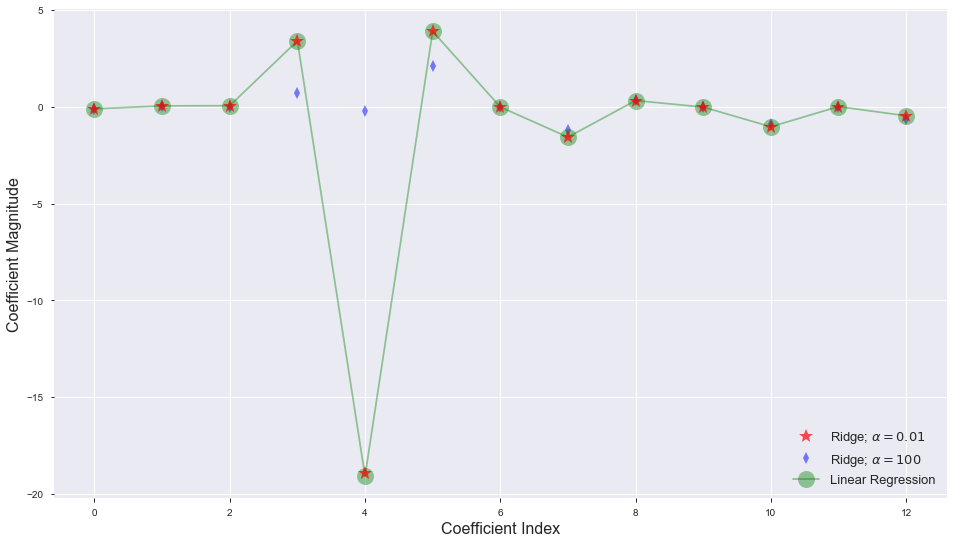

In [106]:
plt.figure(figsize=(16,9))
plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=15,color='red',
         label=r'Ridge; $\alpha = 0.01$',zorder=7)
# zorder for ordering the markers
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=8,color='blue',
         label=r'Ridge; $\alpha = 100$')
# alpha here is for transparency
plt.plot(lr.coef_,alpha=0.4,marker='o',markersize=17,color='green',label='Linear Regression')

plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()

### Lasso Regression

Lasso regression is a type of linear regression that uses shrinkage. Shrinkage is where data values are shrunk towards a central point, like the mean. The lasso procedure encourages simple, sparse models (i.e. models with fewer parameters). This particular type of regression is well-suited for models showing high levels of muticollinearity or when you want to automate certain parts of model selection, like variable selection/parameter elimination.


The acronym “LASSO” stands for Least Absolute Shrinkage and Selection Operator.

**L1 Regularization**

Lasso regression performs L1 regularization, which adds a penalty equal to the absolute value of the magnitude of coefficients. This type of regularization can result in sparse models with few coefficients; Some coefficients can become zero and eliminated from the model. Larger penalties result in coefficient values closer to zero, which is the ideal for producing simpler models. On the other hand, L2 regularization (e.g. Ridge regression) doesn’t result in elimination of coefficients or sparse models. This makes the Lasso far easier to interpret than the Ridge.

**Performing the Regression**

Lasso solutions are quadratic programming problems, which are best solved with software (like Matlab). The goal of the algorithm is to minimize:
lasso regression

![](https://lh3.googleusercontent.com/-tc3QPCDZQbc/XXcWmR1nmBI/AAAAAAAAhlI/gUCn7H5dB0g-Gul0mGKYCfJ9ymGRbSAAQCK8BGAs/s0/2019-09-09.png)

Which is the same as minimizing the sum of squares with constraint Σ |Bj≤ s. Some of the βs are shrunk to exactly zero, resulting in a regression model that’s easier to interpret.

A tuning parameter, λ controls the strength of the L1 penalty. λ is basically the amount of shrinkage:

* When λ = 0, no parameters are eliminated. The estimate is equal to the one found with linear regression.
* As λ increases, more and more coefficients are set to zero and eliminated (theoretically, when λ = ∞, all coefficients are eliminated).
* As λ increases, bias increases.
* As λ decreases, variance increases.


* Lasso stands for Least Absolute Shrinkage Selector Operator. 
* Lasso assigns a penalty to the coefficients in the linear model using the formula below and eliminates variables with coefficients that zero. 
* This is called shrinkage or the process where data values are shrunk to a central point such as a mean.

**Lasso Formula:**
    Lasso = Sum of Error + Sum of the absolute value of coefficients
    
$L = ∑( Ŷi– Yi)² + λ∑ |β|$

* Looking at the formula, Lasso adds a penalty equal to the absolute value of the magnitude of the coefficients multiplied by lambda. 
* The value of lambda also plays a key role in how much weight you assign to the penalty for the coefficients. 
* This penalty reduces the value of many coefficients to zero, all of which are eliminated.

##### What is the significance of adding a penalty to coefficients in lasso?

1. Lasso adds a penalty to coefficients the model overemphasizes. 
2. This reduces the degree of overfitting that occurs within the model.

##### What are some limitations of the Lasso model?

1. Lasso does not work well with multicollinearity. 
2. If you are unfamiliar, multicollinearity occurs when some of the dependent variables are correlated with each other. 
3. Why? Lasso might randomly choose one of the multicollinear variables without understanding the context. 
4. Such an action might eliminate relevant independent variables.

In [83]:
La = Lasso()

In [85]:
La.fit(X_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [87]:
La.coef_

array([-0.06616591,  0.05172297, -0.        ,  0.        , -0.        ,
        0.76905004,  0.01254777, -0.78652975,  0.28095351, -0.01593456,
       -0.82030425,  0.00938792, -0.71719235])

In [89]:
La.intercept_

44.04095155695097

In [91]:
La.score(X_train,y_train)

0.6732056091593147

In [92]:
La.score(X_test,y_test)

0.7108039719058299

##### Elastic Net
* Elastic Net combines characteristics of both lasso and ridge. 
* Elastic Net reduces the impact of different features while not eliminating all of the features.

The formula as you can see below is the sum of the lasso and ridge formulas.

**Elastic Net Formula:** Ridge + Lasso

$L = ∑( Ŷi– Yi)² + λ∑ β² + λ∑ |β|$

* To conclude, Lasso, Ridge, and Elastic Net are excellent methods to improve the performance of your linear model. 
* This includes if you are running a neural network, a collection of linear models. 
* Lasso will eliminate many features, and reduce overfitting in your linear model. 
* Ridge will reduce the impact of features that are not important in predicting your y values. 
* Elastic Net combines feature elimination from Lasso and feature coefficient reduction from the Ridge model to improve your model’s predictions.

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
enet = ElasticNet()

In [53]:
enet.fit(X_train,y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [60]:
Coef = enet.coef_
Coef

array([-0.08180056,  0.05496056, -0.        ,  0.        , -0.        ,
        0.8785845 ,  0.01232451, -0.84091346,  0.31837596, -0.01742032,
       -0.82968896,  0.00953384, -0.70927749])

##### Feature Importance

Feature: 0, Score: -0.08180
Feature: 1, Score: 0.05496
Feature: 2, Score: -0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: -0.00000
Feature: 5, Score: 0.87858
Feature: 6, Score: 0.01232
Feature: 7, Score: -0.84091
Feature: 8, Score: 0.31838
Feature: 9, Score: -0.01742
Feature: 10, Score: -0.82969
Feature: 11, Score: 0.00953
Feature: 12, Score: -0.70928


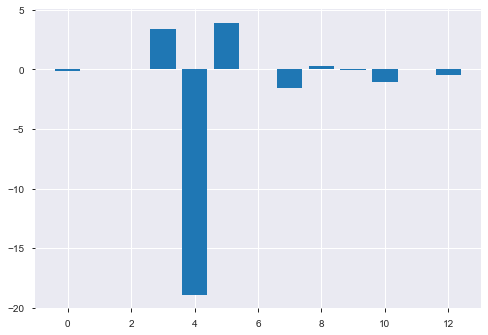

In [61]:
# get importance
# summarize feature importance
for i,v in enumerate(Coef):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [63]:
enet.score(X_train,y_train)

0.6781196963554237

In [64]:
enet.score(X_test,y_test)

0.7149463864562293

In [5]:
from sklearn.linear_model import LassoCV,RidgeCV,ElasticNetCV

In [65]:
Lasso_CV = LassoCV()
Ridge_CV = RidgeCV()
ENETCV = ElasticNetCV()

In [66]:
Lasso_CV.fit(X_train,y_train)
Ridge_CV.fit(X_train,y_train)
ENETCV.fit(X_train,y_train)

ElasticNetCV(alphas=None, copy_X=True, cv='warn', eps=0.001, fit_intercept=True,
             l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=None,
             normalize=False, positive=False, precompute='auto',
             random_state=None, selection='cyclic', tol=0.0001, verbose=0)

In [71]:
ENETCV_Imp=ENETCV.coef_

Feature: 0, Score: -0.07229
Feature: 1, Score: 0.05259
Feature: 2, Score: -0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: -0.00000
Feature: 5, Score: 0.51660
Feature: 6, Score: 0.01935
Feature: 7, Score: -0.67600
Feature: 8, Score: 0.29533
Feature: 9, Score: -0.01662
Feature: 10, Score: -0.77092
Feature: 11, Score: 0.00919
Feature: 12, Score: -0.72980


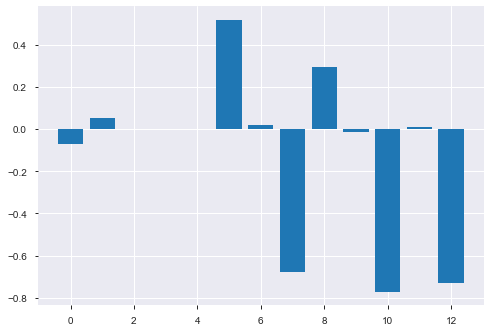

In [73]:
# summarize feature importance
for i,v in enumerate(ENETCV_Imp):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(ENETCV_Imp))], ENETCV_Imp)
plt.show()

In [74]:
Ridge_CV_imp= Ridge_CV.coef_

Feature: 0, Score: -0.10487
Feature: 1, Score: 0.04949
Feature: 2, Score: 0.05282
Feature: 3, Score: 3.38997
Feature: 4, Score: -17.61953
Feature: 5, Score: 3.90733
Feature: 6, Score: -0.00942
Feature: 7, Score: -1.54396
Feature: 8, Score: 0.31993
Feature: 9, Score: -0.01372
Feature: 10, Score: -1.01194
Feature: 11, Score: 0.01051
Feature: 12, Score: -0.46309


<BarContainer object of 13 artists>

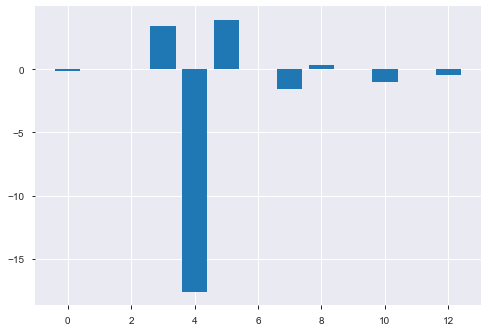

In [75]:
for i,v in enumerate(Ridge_CV_imp):
    print("Feature: %0d, Score: %.5f" % (i,v))
plt.bar([x for x in range(len(Ridge_CV_imp))],Ridge_CV_imp)

In [76]:
Lasso_CV.coef_

array([-0.07565688,  0.05200281, -0.        ,  0.        , -0.        ,
        1.73425713,  0.00199153, -0.92985319,  0.28657849, -0.01610521,
       -0.82526444,  0.01002392, -0.65142454])

In [77]:
Lasso_CV.coef_

array([-0.07565688,  0.05200281, -0.        ,  0.        , -0.        ,
        1.73425713,  0.00199153, -0.92985319,  0.28657849, -0.01610521,
       -0.82526444,  0.01002392, -0.65142454])

In [98]:
Predicate = pd.DataFrame({'Lasso_CV_Pred':Lasso_CV.predict(X_test),
                          'Ridge_Cv_Pred':Ridge_CV.predict(X_test),
                          "Elastic_Net_cv":ENETCV.predict(X_test),       
                          'rr':rr.predict(X_test),
                          'La':La.predict(X_test),
                          "enet":enet.predict(X_test),
                          "Actual_Data":y_test
                         })
Predicate

Lasso_CV_Pred  Ridge_Cv_Pred  Elastic_Net_cv         rr         La  \
45       23.149385      22.036809       23.753941  22.057562  23.662042   
344      28.979621      28.141637       28.789721  28.060529  28.845109   
500      20.813170      20.266816       20.827040  20.240366  20.850483   
153      21.897155      17.454462       22.148121  17.226665  22.307881   
98       31.592825      34.718374       29.737972  34.731161  30.295982   
..             ...            ...             ...        ...        ...   
238      28.244523      28.318154       28.142301  28.331607  28.223821   
225      34.688403      39.325901       32.311317  39.373235  32.828990   
293      25.537607      26.102365       25.439447  26.179371  25.616706   
445      11.347629      12.006034       10.614556  11.946105  10.694415   
369      29.227427      32.541262       29.387905  32.602004  29.361653   

          enet  Actual_Data  
45   23.555612         19.3  
344  28.805038         31.2  
500  20.810209         16.8  
153  22.224913         19.4  
98   30.356446         43.8  
..         ...          ...  
238  28.239489         23.7  
225  33.194819         50.0  
293  25.501116         23.9  
445  10.842877         11.8  
369  29.534945         50.0  

[102 rows x 7 columns]

In [104]:
LassoCV_Prediction=Lasso_CV.predict(X_test)
pd.DataFrame({"LassoCV_Prediction":LassoCV_Prediction,
             "Actual":y_test,
             "Error":y_test-LassoCV_Prediction})

LassoCV_Prediction  Actual      Error
45            23.149385    19.3  -3.849385
344           28.979621    31.2   2.220379
500           20.813170    16.8  -4.013170
153           21.897155    19.4  -2.497155
98            31.592825    43.8  12.207175
..                  ...     ...        ...
238           28.244523    23.7  -4.544523
225           34.688403    50.0  15.311597
293           25.537607    23.9  -1.637607
445           11.347629    11.8   0.452371
369           29.227427    50.0  20.772573

[102 rows x 3 columns]

![](https://lh3.googleusercontent.com/-1itUx6Kdihc/XXcb850PVNI/AAAAAAAAhlU/gEjLH04HyrsOBYIyXEGvEqO0R2cMtlikACK8BGAs/s0/2019-09-09.png)